<a href="https://colab.research.google.com/github/melindasaf/050_Angrayni-Melinda-S_POSTTEST-2-PDAB/blob/main/050_Angrayni_Melinda_S_Posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [115]:
import requests

url = "https://github.com/melindasaf/050_Angrayni-Melinda-S_POSTTEST-2-PDAB/raw/main/dataset_market_basket.txt"
response = requests.get(url)

with open("dataset_market_basket.txt", "w") as file:
    file.write(response.text)
    
with open("dataset_market_basket.txt") as file:
    raw_data = file.read()

In [116]:
raw_data

'whole milk,pastry,salty snack\nsausage,whole milk,semi-finished bread,yogurt\nsoda,pickled vegetables\ncanned beer,misc. beverages\nsausage,hygiene articles\nsausage,whole milk,rolls/buns\nwhole milk,soda\nfrankfurter,soda,whipped/sour cream\nfrankfurter,curd\nbeef,white bread\nbutter,whole milk\nfrozen vegetables,other vegetables\ntropical fruit,sugar\nbutter milk,specialty chocolate\nfrozen meals,dental care\nrolls/buns,rolls/buns\nroot vegetables,detergent\nsausage,rolls/buns\ndish cleaner,cling film/bags'

In [117]:
data = raw_data.split("\n")

In [118]:
dataset =[item.split(",") for item in data]

In [119]:
#mengubah list of lists menjadi satu list tunggal
items = [item for sublist in dataset for item in sublist]

#membuat set unik dari items
unique_items = set(items)

# menghitung frekuensi setiap jenis item pada setiap baris dalam dataset
tabular_data = []
for row in dataset:
    row_data = {}
    for item in unique_items:
        row_data[item] = row.count(item)
    tabular_data.append(row_data)    

# membuat tabel tabular menggunakan pandas DataFrame
print("\n--TABEL TABULASI--")
df = pd.DataFrame(tabular_data)
df


--TABEL TABULASI--


,pickled vegetables,sugar,frozen vegetables,pastry,detergent,frozen meals,sausage,dish cleaner,rolls/buns,misc. beverages,hygiene articles,dental care,cling film/bags,butter milk,frankfurter,specialty chocolate,butter,salty snack,whipped/sour cream,soda,beef,white bread,other vegetables,yogurt,semi-finished bread,root vegetables,canned beer,curd,tropical fruit,whole milk
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [120]:
# 1 Item set
df.sum()

pickled vegetables     1
sugar                  1
frozen vegetables      1
pastry                 1
detergent              1
frozen meals           1
sausage                4
dish cleaner           1
rolls/buns             4
misc. beverages        1
hygiene articles       1
dental care            1
cling film/bags        1
butter milk            1
frankfurter            2
specialty chocolate    1
butter                 1
salty snack            1
whipped/sour cream     1
soda                   3
beef                   1
white bread            1
other vegetables       1
yogurt                 1
semi-finished bread    1
root vegetables        1
canned beer            1
curd                   1
tropical fruit         1
whole milk             5
dtype: int64

In [121]:
# Melihat nama nama kolom yang ada dalam data market
df.columns

Index(['pickled vegetables', 'sugar', 'frozen vegetables', 'pastry', 'detergent', 'frozen meals', 'sausage', 'dish cleaner', 'rolls/buns', 'misc. beverages', 'hygiene articles', 'dental care',
       'cling film/bags', 'butter milk', 'frankfurter', 'specialty chocolate', 'butter', 'salty snack', 'whipped/sour cream', 'soda', 'beef', 'white bread', 'other vegetables', 'yogurt',
       'semi-finished bread', 'root vegetables', 'canned beer', 'curd', 'tropical fruit', 'whole milk'],
      dtype='object')

In [122]:
# 2 Item set
from itertools import permutations #Library untuk buat kombinasi barang

# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('pickled vegetables', 'sugar'),
 ('pickled vegetables', 'frozen vegetables'),
 ('pickled vegetables', 'pastry'),
 ('pickled vegetables', 'detergent'),
 ('pickled vegetables', 'frozen meals'),
 ('pickled vegetables', 'sausage'),
 ('pickled vegetables', 'dish cleaner'),
 ('pickled vegetables', 'rolls/buns'),
 ('pickled vegetables', 'misc. beverages'),
 ('pickled vegetables', 'hygiene articles'),
 ('pickled vegetables', 'dental care'),
 ('pickled vegetables', 'cling film/bags'),
 ('pickled vegetables', 'butter milk'),
 ('pickled vegetables', 'frankfurter'),
 ('pickled vegetables', 'specialty chocolate'),
 ('pickled vegetables', 'butter'),
 ('pickled vegetables', 'salty snack'),
 ('pickled vegetables', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('pickled vegetables', 'beef'),
 ('pickled vegetables', 'white bread'),
 ('pickled vegetables', 'other vegetables'),
 ('pickled vegetables', 'yogurt'),
 ('pickled vegetables', 'semi-finished bread'),
 ('pickled vegetables', 'root veg

In [123]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('pickled vegetables', 'soda'),
 ('sugar', 'tropical fruit'),
 ('frozen vegetables', 'other vegetables'),
 ('pastry', 'salty snack'),
 ('pastry', 'whole milk'),
 ('detergent', 'root vegetables'),
 ('frozen meals', 'dental care'),
 ('sausage', 'rolls/buns'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'yogurt'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'whole milk'),
 ('dish cleaner', 'cling film/bags'),
 ('rolls/buns', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('dental care', 'frozen meals'),
 ('cling film/bags', 'dish cleaner'),
 ('butter milk', 'specialty chocolate'),
 ('frankfurter', 'whipped/sour cream'),
 ('frankfurter', 'soda'),
 ('frankfurter', 'curd'),
 ('specialty chocolate', 'butter milk'),
 ('butter', 'whole milk'),
 ('salty snack', 'pastry'),
 ('salty snack', 'whole milk'),
 ('whipped/sour cream', 'frankfurter'),
 ('whipped/sour cream', 'soda'),
 ('soda', 'pickled vegetables'),
 ('soda', '

In [124]:
# Menghitung banyaknya data pada setiap kombinasi
hitung = {} #Mengganti dictionary
for rule in rule_baru:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('pickled vegetables', 'soda')": 1,
 "('sugar', 'tropical fruit')": 1,
 "('frozen vegetables', 'other vegetables')": 1,
 "('pastry', 'salty snack')": 1,
 "('pastry', 'whole milk')": 1,
 "('detergent', 'root vegetables')": 1,
 "('frozen meals', 'dental care')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'whole milk')": 2,
 "('dish cleaner', 'cling film/bags')": 1,
 "('rolls/buns', 'sausage')": 2,
 "('rolls/buns', 'whole milk')": 1,
 "('misc. beverages', 'canned beer')": 1,
 "('hygiene articles', 'sausage')": 1,
 "('dental care', 'frozen meals')": 1,
 "('cling film/bags', 'dish cleaner')": 1,
 "('butter milk', 'specialty chocolate')": 1,
 "('frankfurter', 'whipped/sour cream')": 1,
 "('frankfurter', 'soda')": 1,
 "('frankfurter', 'curd')": 1,
 "('specialty chocolate', 'butter milk')": 1,
 "('butter', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('salty snack', '

In [125]:
# List support
# supp = [i/len(df)*100 for i in hitung.values()]
# print(supp)


print("\n--NILAI SUPPORT--\n")
for item,ab in hitung.items():
  print(f"{item} support = {round(ab/len(df)*100)}%")


--NILAI SUPPORT--

('pickled vegetables', 'soda') support = 5%
('sugar', 'tropical fruit') support = 5%
('frozen vegetables', 'other vegetables') support = 5%
('pastry', 'salty snack') support = 5%
('pastry', 'whole milk') support = 5%
('detergent', 'root vegetables') support = 5%
('frozen meals', 'dental care') support = 5%
('sausage', 'rolls/buns') support = 11%
('sausage', 'hygiene articles') support = 5%
('sausage', 'yogurt') support = 5%
('sausage', 'semi-finished bread') support = 5%
('sausage', 'whole milk') support = 11%
('dish cleaner', 'cling film/bags') support = 5%
('rolls/buns', 'sausage') support = 11%
('rolls/buns', 'whole milk') support = 5%
('misc. beverages', 'canned beer') support = 5%
('hygiene articles', 'sausage') support = 5%
('dental care', 'frozen meals') support = 5%
('cling film/bags', 'dish cleaner') support = 5%
('butter milk', 'specialty chocolate') support = 5%
('frankfurter', 'whipped/sour cream') support = 5%
('frankfurter', 'soda') support = 5%
('fran

In [126]:
# List Confidence
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("\n--NILAI CONFIDENCE--\n")
for item,ab in hitung.items():
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {round(ab/df[i[0]].sum()*100)}%")


--NILAI CONFIDENCE--

pickled vegetables->soda  Confidence = 100%
sugar->tropical fruit  Confidence = 100%
frozen vegetables->other vegetables  Confidence = 100%
pastry->salty snack  Confidence = 100%
pastry->whole milk  Confidence = 100%
detergent->root vegetables  Confidence = 100%
frozen meals->dental care  Confidence = 100%
sausage->rolls/buns  Confidence = 50%
sausage->hygiene articles  Confidence = 25%
sausage->yogurt  Confidence = 25%
sausage->semi-finished bread  Confidence = 25%
sausage->whole milk  Confidence = 50%
dish cleaner->cling film/bags  Confidence = 100%
rolls/buns->sausage  Confidence = 50%
rolls/buns->whole milk  Confidence = 25%
misc. beverages->canned beer  Confidence = 100%
hygiene articles->sausage  Confidence = 100%
dental care->frozen meals  Confidence = 100%
cling film/bags->dish cleaner  Confidence = 100%
butter milk->specialty chocolate  Confidence = 100%
frankfurter->whipped/sour cream  Confidence = 50%
frankfurter->soda  Confidence = 50%
frankfurter->cu

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

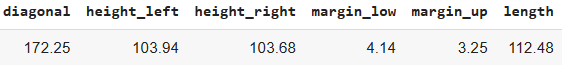
<!-- 1412 -->

In [127]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import pandas as pd

In [128]:
url = "https://raw.githubusercontent.com/melindasaf/050_Angrayni-Melinda-S_POSTTEST-2-PDAB/main/deteksi_uang_palsu.csv"
df = pd.read_csv(url)
df


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


## Membuat tabel jarak

In [129]:
# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df['distance'] = np.sqrt(
    (df['diagonal'] - new_data['diagonal'].values[0])**2
    + (df['height_left'] - new_data['height_left'].values[0])**2
    + (df['height_right'] - new_data['height_right'].values[0])**2
    + (df['margin_low'] - new_data['margin_low'].values[0])**2
    + (df['margin_up'] - new_data['margin_up'].values[0])**2
    + (df['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


## Menambahkan kolom jarak

In [130]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

## Mengurutkan data dari yang terkecil ke yang terbesar

In [131]:
# Mengurutkan data dari kecil ke besar
sorted_data = df.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df)))

# Menentukan data terdekat
data_terdekat = sorted_data.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


## Menentukan hasil prediksi berdasarkan label terbanyak

In [132]:
print("Dengan mengacu pada respons nomor 2, maka dapat disimpulkan hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df.drop(columns=['is_genuine','distance'],axis=1)
y_train = df['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Dengan mengacu pada respons nomor 2, maka dapat disimpulkan hasil prediksinya adalah : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Angrayni Melinda Safitri

> Nim : 2109116050


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

Tema : Kesehatan

Judul Data : Heart Disease Risk Factors Dataset

Sumber : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## Bussines Understanding


Heart Disease Dataset adalah kumpulan data medis yang mengandung informasi tentang pasien dengan penyakit jantung. Dataset ini terdiri dari 16 kolom, di antaranya adalah umur, jenis kelamin, tekanan darah, kolesterol, elektrokardiogram istirahat, denyut jantung maksimum tercapai selama tes latihan, jenis nyeri dada, dan tiga fitur thalassemia.

Tujuan dari Heart Disease Dataset adalah untuk memahami faktor-faktor risiko yang berkaitan dengan penyakit jantung dan memprediksi kemungkinan seseorang mengalami penyakit jantung. Dengan menggunakan dataset ini, para peneliti dan dokter dapat mengidentifikasi faktor risiko tertentu yang berhubungan dengan penyakit jantung, sehingga dapat membantu dalam mencegah atau mengatasi penyakit tersebut.

## Data Understanding

### Collect Data

Sumber Data : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

### Penjelasan Kolom

1. id: sebagai identifier untuk setiap baris atau data dalam dataset
2. age: umur pasien dalam tahun
3. sex: jenis kelamin pasien (kategori : male dan female)
4. dataset: lokasi pengambilan data
5. cp: jenis nyeri dada yang dialami pasien
6. trestbps: tekanan darah istirahat pasien (dalam mmHg saat masuk ke rumah sakit)
7. chol: kadar serum kolestrol pasien (dalam mg/dl)
8. fbs: kadar gula darah puasa pasien (value = true atau false)
9. restecg: hasil elektrokardiogram istirahat pasien
10. thalach: denyut jantung maksimum tercapai selama tes latihan
11. exang: apakah pasien mengalami angina yang diinduksi latihan, 0 = tidak, 1 = ya
12. oldpeak: Depresi ST relatif terhadap latihan sebelumnya
13. slope: kemiringan segmen ST latihan puncak
14. ca: number of major vessels colored by fluoroscopy ( jumlah pembuluh besar yang terlihat)
14. thal: jenis thalassemia yang dialami oleh pasien
15. num: status penyakit jantung, 0 = tidak terkena penyakit jantung, 1 = terkena penyakit jantung ringan, 2 = terkena penyakit jantung sedang, 3 = terkena penyakit jantung berat, 4 = terkena penyakit jantung yang sangat berat





In [133]:
import pandas as pd

url = "https://raw.githubusercontent.com/melindasaf/050_Angrayni-Melinda-S_POSTTEST-2-PDAB/main/heart_disease_uci.csv"
df2 = pd.read_csv(url)
df2

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [134]:
df2.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [135]:
df2.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [136]:
df2.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [137]:
df3 = df2[df2['cp'] == 'asymptomatic'] 

# Menampilkan hasil filter
print(df3)

      id  age     sex        dataset            cp  trestbps   chol    fbs           restecg  thalch  exang  oldpeak        slope   ca               thal  num
1      2   67    Male      Cleveland  asymptomatic     160.0  286.0  False    lv hypertrophy   108.0   True      1.5         flat  3.0             normal    2
2      3   67    Male      Cleveland  asymptomatic     120.0  229.0  False    lv hypertrophy   129.0   True      2.6         flat  2.0  reversable defect    1
6      7   62  Female      Cleveland  asymptomatic     140.0  268.0  False    lv hypertrophy   160.0  False      3.6  downsloping  2.0             normal    3
7      8   57  Female      Cleveland  asymptomatic     120.0  354.0  False            normal   163.0   True      0.6    upsloping  0.0             normal    0
8      9   63    Male      Cleveland  asymptomatic     130.0  254.0  False    lv hypertrophy   147.0  False      1.4         flat  1.0  reversable defect    2
..   ...  ...     ...            ...          

In [138]:
df4 = df2[df2['sex'] == 'Male'] 

# Menampilkan hasil filter
print(df4)

      id  age   sex        dataset               cp  trestbps   chol    fbs           restecg  thalch  exang  oldpeak        slope   ca               thal  num
0      1   63  Male      Cleveland   typical angina     145.0  233.0   True    lv hypertrophy   150.0  False      2.3  downsloping  0.0       fixed defect    0
1      2   67  Male      Cleveland     asymptomatic     160.0  286.0  False    lv hypertrophy   108.0   True      1.5         flat  3.0             normal    2
2      3   67  Male      Cleveland     asymptomatic     120.0  229.0  False    lv hypertrophy   129.0   True      2.6         flat  2.0  reversable defect    1
3      4   37  Male      Cleveland      non-anginal     130.0  250.0  False            normal   187.0  False      3.5  downsloping  0.0             normal    0
5      6   56  Male      Cleveland  atypical angina     120.0  236.0  False            normal   178.0  False      0.8    upsloping  0.0             normal    0
..   ...  ...   ...            ...      

##### Describe Data

In [139]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [140]:
df2.select_dtypes(include=np.number)

,id,age,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,2
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,NaN,1
916,917,62,NaN,139.0,NaN,NaN,NaN,0
917,918,55,122.0,223.0,100.0,0.0,NaN,2
918,919,58,NaN,385.0,NaN,NaN,NaN,0


In [141]:
def tampil(kolom):
  dfnum = df2[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())

In [142]:
tampil("trestbps")

Nilai minimum         : 0.0
Nilai maksimum        : 200.0


In [143]:
tampil("chol")

Nilai minimum         : 0.0
Nilai maksimum        : 603.0


In [144]:
tampil("thalch")

Nilai minimum         : 60.0
Nilai maksimum        : 202.0


##### Explore Data

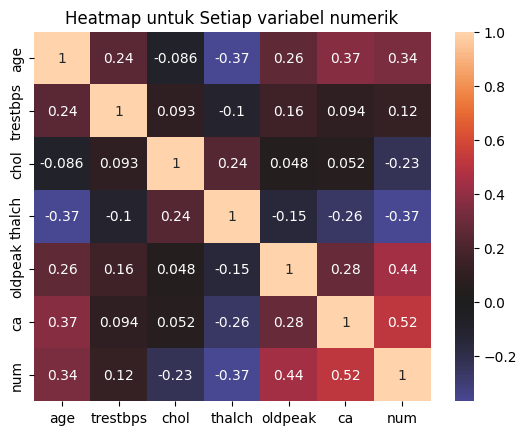

In [145]:
sns.heatmap(
    df2[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']].corr(),
    annot=True,
    center=0,
);
plt.title('Heatmap untuk Setiap variabel numerik')
plt.show()

#### Visualisasi Comparison


<Axes: xlabel='restecg', ylabel='count'>

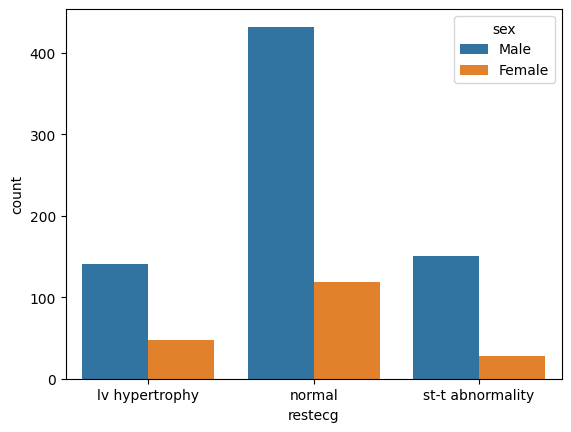

In [146]:
# Visualisasi yang menampilkan berapa banyak sex(gender) berdasarkan restecg
sns.countplot(data=df2,x="restecg", hue="sex")

<Axes: xlabel='count', ylabel='cp'>

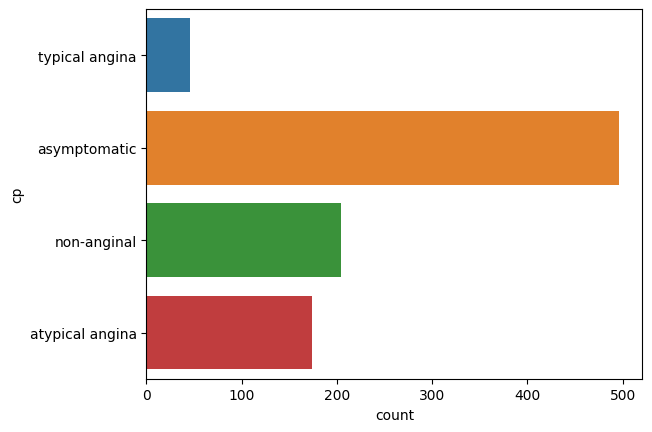

In [147]:
# Visualisasi yang menampilkan berapa banyak cp berdasarkan kategorinya
sns.countplot(data=df2,y="cp")

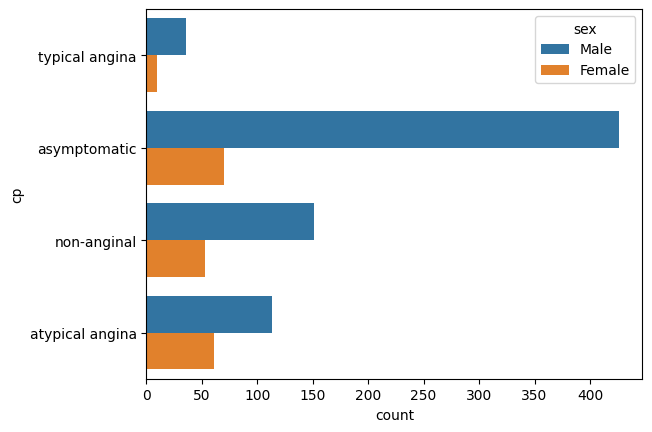

In [148]:
# Buatlah visualisasi yang menampilkan berapa banyak cp berdasarkan sex (gender)
sns.countplot(data=df2, y='cp', hue="sex");

#### Visualisasi Distribution

<Axes: xlabel='thalch', ylabel='Count'>

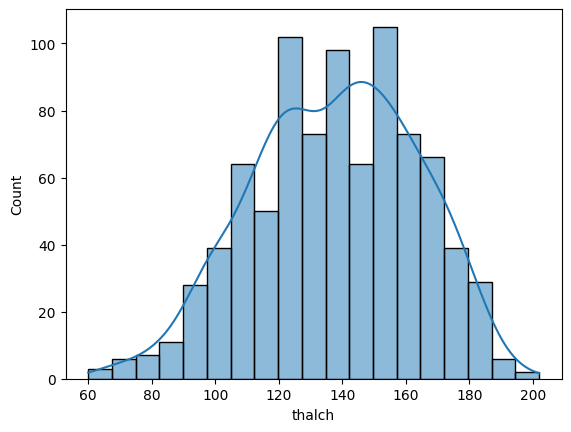

In [149]:
# Histogram untuk thalch
sns.histplot(data=df2, x="thalch", kde=True)

<Axes: xlabel='thalch'>

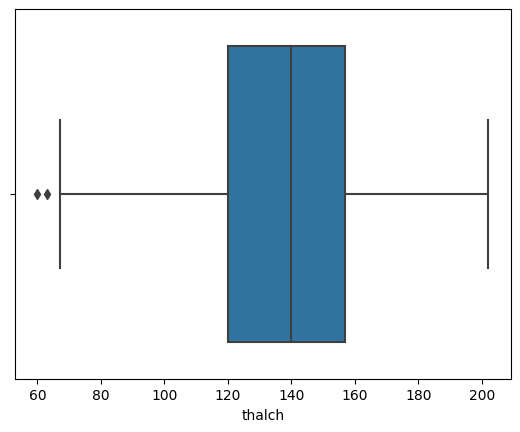

In [150]:
# Boxplot untuk thalch
sns.boxplot(data=df2,x="thalch")

#### Visualisasi Reletionship

<Axes: xlabel='thalch', ylabel='age'>

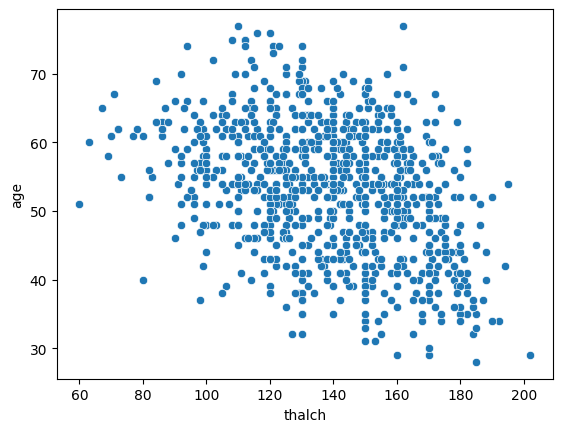

In [151]:
# Scatterplot untuk thalch dan age
sns.scatterplot(data=df2,x="thalch",y="age")

#### Visualisasi Composition

In [152]:
# Pieplot untuk dataset	
px.pie(df2,names="dataset")

##### Verify Data Quality



In [153]:
# Check for missing values
missing_values = df2.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [154]:
duplicate_rows = df2.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


In [155]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 age           0
ca           20
chol        183
cp            0
dataset       0
exang         0
fbs           0
id            0
num           0
oldpeak      16
restecg       0
sex           0
slope         0
thal          0
thalch        2
trestbps     28
dtype: int64


<ipython-input-155-3c2bcf544dce>:4: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [156]:
# Check data types
print("Data types:\n", df.dtypes)

Data types:
 is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
distance        float64
dtype: object


## Data Preparation

##### Select Data

In [157]:
# Membuat hanya menampikan 2 Kolom
selected_data = df2[["age", "chol"]]

# Menampilkan Perintah
print(selected_data.head())

   age   chol
0   63  233.0
1   67  286.0
2   67  229.0
3   37  250.0
4   41  204.0


In [158]:
# Membuat hanya menampikan 3 Kolom
selected_data = df2[["id", "thalch", "num"]]

# Menampilkan Perintah
print(selected_data.head())

   id  thalch  num
0   1   150.0    0
1   2   108.0    2
2   3   129.0    1
3   4   187.0    0
4   5   172.0    0


##### Cleaning Data

In [159]:
df2.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [160]:
df2.isna().sum() / len(df) * 100

id             0.0
age            0.0
sex            0.0
dataset        0.0
cp             0.0
trestbps     590.0
chol         300.0
fbs          900.0
restecg       20.0
thalch       550.0
exang        550.0
oldpeak      620.0
slope       3090.0
ca          6110.0
thal        4860.0
num            0.0
dtype: float64

##### Transform Data

In [161]:
df2 = pd.get_dummies(df2)
print(df2)

      id  age  trestbps   chol  thalch  oldpeak   ca  num  sex_Female  sex_Male  dataset_Cleveland  dataset_Hungary  dataset_Switzerland  dataset_VA Long Beach  cp_asymptomatic  cp_atypical angina  \
0      1   63     145.0  233.0   150.0      2.3  0.0    0           0         1                  1                0                    0                      0                0                   0   
1      2   67     160.0  286.0   108.0      1.5  3.0    2           0         1                  1                0                    0                      0                1                   0   
2      3   67     120.0  229.0   129.0      2.6  2.0    1           0         1                  1                0                    0                      0                1                   0   
3      4   37     130.0  250.0   187.0      3.5  0.0    0           0         1                  1                0                    0                      0                0                   0   


##### Split Data

In [163]:
from sklearn.model_selection import train_test_split
x = df2.drop('id',axis=1)
y = df2['id']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)

     age  trestbps   chol  thalch  oldpeak   ca  num  sex_Female  sex_Male  dataset_Cleveland  dataset_Hungary  dataset_Switzerland  dataset_VA Long Beach  cp_asymptomatic  cp_atypical angina  \
363   43     120.0  201.0   165.0      0.0  NaN    0           1         0                  0                1                    0                      0                0                   1   
481   59     130.0  188.0   124.0      1.0  NaN    0           1         0                  0                1                    0                      0                0                   1   
650   55     120.0    0.0    92.0      0.3  NaN    4           0         1                  0                0                    1                      0                1                   0   
483   59     130.0  318.0   120.0      1.0  NaN    0           0         1                  0                1                    0                      0                0                   0   
355   42     115.0  211.0